In [64]:
poised = {'x0305': 'Z219104216',
 'x0107': 'Z1129283193',
 'x0072': 'Z45617795',
 'x1187': 'Z2643472210',
 'x0104': 'Z1220452176',
 'x1226': 'Z1013717730',
 'x1237': 'Z119990900',
 'x0464': 'Z2217052426',
 'x0499': 'Z1545313172',
 'x0165': 'Z44584877',
 'x1086': 'Z959357244',
 'x0398': 'Z57600778',
 'x1119': 'Z104492884',
 'x1132': 'Z217038356',
 'x0177': 'Z33545544',
 'x0161': 'Z18197050',
 'x0376': 'Z31432226',
 'x0390': 'Z1587220559',
 'x0434': 'Z44592329',
 'x0540': 'Z111507846',
 'x0387': 'Z905434478',
 'x1077': 'Z1348371854',
 'x0194': 'Z54571979',
 'x1249': 'Z509756472',
 'x0195': 'Z1333043510',
 'x0426': 'Z606937774',
 'x0354': 'Z31432917',
 'x0397': 'Z369936976',
 'x0425': 'Z1401276297',
 'x0669': 'Z54747696',
 'x0478': 'Z24758179',
 'x0336': 'Z30932204',
 'x1163': 'Z1123700045',
 'x0678': 'Z31792168'}

In [65]:
len(poised)

34

In [11]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import gzip

with gzip.open('moonshot_submissions.pkl.gz', 'rb') as fh:
    _m = pd.read_pickle(fh)

moonshot = _m.loc[_m.okay][['CID (canonical)','CID_group', 'old_index', 'clean_creator', 'internal', 'SMILES', 'new_smiles',
                           'fragments', 'xcode', 'Structure ID', 'site_name', 'pdb_entry',
                            'series',
                            'postera_SAScore', 'postera_minNumSteps',
                            'purchasable', 'SAScore', 'midprefix', 'category', 'quarter (shipment)', 'quarter (submission)',
                            'ORDERED', 'MADE', 'ASSAYED', 'in_fragalysis',
                            'IC50', 'pIC50', 'purchasable',
                           'submission_date', 'inferred_submission_date', 'order_date', 'shipment_date', 
                           'description', 'initial_screen',
                           'N_creator_submission', 'N_submission_group', 'resubmitted',
                           'Enamine - REAL Space', 'Enamine - Extended REAL Space',
                           'Enamine - SCR', 'Enamine - BB', 'Mcule', 'Mcule Ultimate',
                           'N_chars', 'N_words', 'N_words_cutoff', 'classified_method', 'flesch',
                           'dale_chall']]

In [14]:
moonshot['from_poised_library'] = moonshot.xcode.isin(list(poised.keys()))

In [15]:
sum(moonshot['from_poised_library'])

32

['TRY-UNI-2eddb1ff-7', 'TRY-UNI-714a760b-3', 'TRY-UNI-2eddb1ff-6', 'TRY-UNI-714a760b-19', 'TRY-UNI-714a760b-6', 'TRY-UNI-714a760b-18', 'TRY-UNI-2eddb1ff-2', 'TRY-UNI-714a760b-22', 'TRY-UNI-714a760b-20', 'TRY-UNI-714a760b-12']


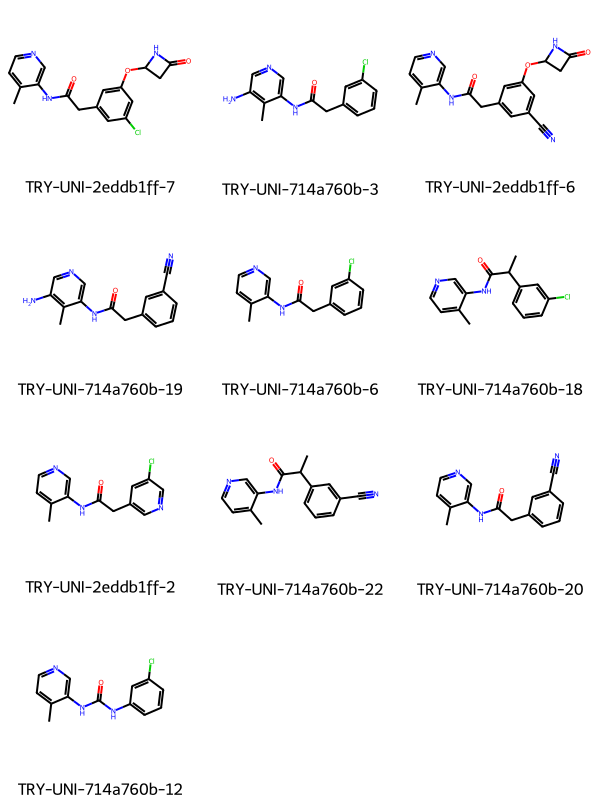

In [36]:
from rdkit import Chem
from rdkit.Chem import Draw

t = moonshot.loc[moonshot['CID (canonical)'].str.contains('TRY-UNI')].sort_values('pIC50', ascending=False).head(10)

print(t.index.to_list())

Draw.MolsToGridImage(t.SMILES.apply(Chem.MolFromSmiles).to_list(), legends=t.index.to_list())

In [66]:

starting = moonshot.loc[moonshot['from_poised_library'] | (moonshot['CID (canonical)'] == 'TRY-UNI-714a760b-6')]
nBits=2**10
radius=2

In [67]:
import umap
from functools import partial
from rdkit import Chem
from rdkit.Chem import AllChem
import pandera.typing as pdt
import numpy.typing as npt

fp: pdt.Series[npt.ArrayLike] = starting.SMILES\
             .apply(Chem.MolFromSmiles)\
             .apply(partial(AllChem.GetMorganFingerprintAsBitVect, radius=radius, nBits=nBits))\
             .apply(np.array)

# random setting from web...
# Jacard is Tanimoto, which makes sense (metric='euclidean' for a one-hot is bad idea)
model = umap.UMAP(metric = "jaccard",   
                  n_neighbors = 25,
                  n_components = 2,
                  low_memory = False,
                  min_dist = 0.001)
_u: npt.ArrayLike = model.fit_transform(np.stack(fp.values))
starting["UMAP_0"]: pdt.Series[float] = _u[:,0]
starting["UMAP_1"]: pdt.Series[float] = _u[:,1]

/Users/matteo/.conda/envs/cc39/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning:

gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable

/var/folders/27/cbp4jxn510947h64f6tvhyvr0000gp/T/ipykernel_6689/1812090898.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/27/cbp4jxn510947h64f6tvhyvr0000gp/T/ipykernel_6689/1812090898.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/27/cbp4jxn510947h64f6tvhyvr0000gp/T/ipykernel_6689/1508437753.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



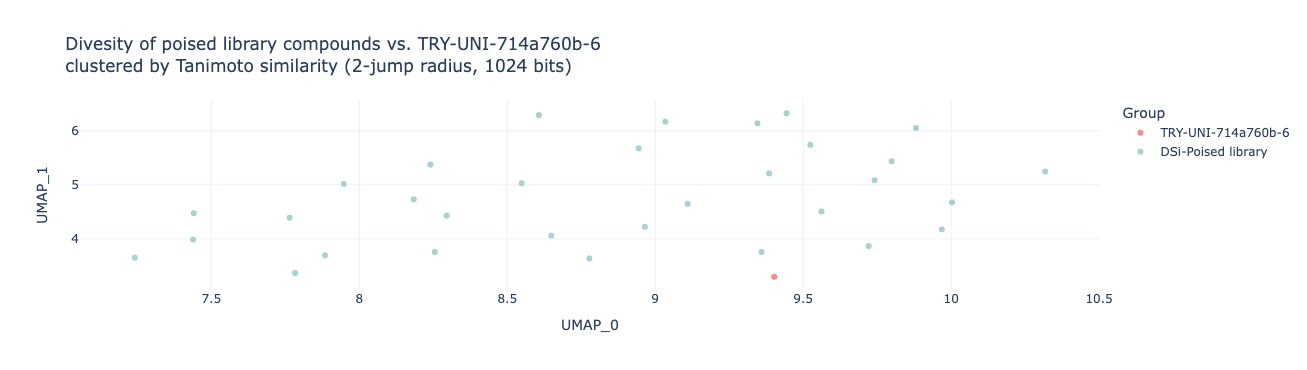

In [68]:
import plotly.express as px

starting['Group'] = starting.from_poised_library.map({True: 'DSi-Poised library', False: 'TRY-UNI-714a760b-6'})

fig = px.scatter(starting, 
                   "UMAP_0", 
                   "UMAP_1",
                 hover_data=['CID (canonical)'],
                 template="plotly_white",
                   color='Group',
                   color_discrete_map={'TRY-UNI-714a760b-6': '#FD8A8A', 'DSi-Poised library': '#A8D1D1'},
                   title=f'Divesity of poised library compounds vs. TRY-UNI-714a760b-6<br>clustered by Tanimoto similarity ({radius}-jump radius, {nBits} bits)',
                   opacity=1
                   )
fig.write_image("images/DSi-poised-tryfon-fp.png")
fig

In [57]:
starting

,CID (canonical),CID_group,old_index,clean_creator,internal,SMILES,new_smiles,fragments,xcode,Structure ID,...,N_chars,N_words,N_words_cutoff,classified_method,flesch,dale_chall,from_poised_library,UMAP_0,UMAP_1,Group
CID (canonical),,,,,,,,,,,,,,,,,,,,,
TRY-UNI-714a760b-6,TRY-UNI-714a760b-6,TRY-UNI-714a760b,129,Tryfon Zarganis,False,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,,"x0107,x0434,x0678,x0748,x0995,x1382",x2646,x2646,...,342,52,52.0,MANUAL,7.701604,11.443889,False,0.770880,15.711918,TRY-UNI-714a760b-6
MAK-UNK-6435e6c2-7,MAK-UNK-6435e6c2-7,MAK-UNK-6435e6c2,923,DSi-Poised Library,False,COC(=O)c1cccc(NS(C)(=O)=O)c1,,x0689,x0478,x0478,...,223,86,86.0,STARTING_LIBRARY,28.017619,22.653019,True,2.921801,16.723097,DSi-Poised library
ALE-HEI-f28a35b5-9,ALE-HEI-f28a35b5-9,ALE-HEI-f28a35b5,1316,Alexander Minges,False,O=C(CC1CCCCC1)Nc1cccnc1,,"x0107,x0434,x0967,x0395,x0678,x0991,x1093",x0678,x0678,...,2887,1031,NaN,MANUAL_POSSIBLY,381.900700,69.008224,True,1.181112,15.501659,DSi-Poised library
AAR-POS-0daf6b7e-23,AAR-POS-0daf6b7e-23,AAR-POS-0daf6b7e,4684,Aaron Morris,True,Cn1ccc(C(=O)NC[C@@H]2CCCO2)n1,,x0072,x1187,x1187,...,77,12,12.0,INITIAL,NaN,NaN,True,1.237037,17.520235,DSi-Poised library
AAR-POS-0daf6b7e-25,AAR-POS-0daf6b7e-25,AAR-POS-0daf6b7e,4686,Aaron Morris,True,Oc1ccccc1CNc1nc2ccccc2[nH]1,,x0072,x0390,x0390,...,77,12,12.0,INITIAL,NaN,NaN,True,3.009145,14.870374,DSi-Poised library
AAR-POS-0daf6b7e-27,AAR-POS-0daf6b7e-27,AAR-POS-0daf6b7e,4688,Aaron Morris,True,c1cnc(N2CCC3(CCOC3)C2)cn1,,x0072,x0425,x0425,...,77,12,12.0,INITIAL,NaN,NaN,True,0.364151,16.348612,DSi-Poised library
AAR-POS-0daf6b7e-28,AAR-POS-0daf6b7e-28,AAR-POS-0daf6b7e,4689,Aaron Morris,True,c1ccc(SCCN2CCOCC2)cc1,,x0072,x0398,x0398,...,77,12,12.0,INITIAL,NaN,NaN,True,-0.013551,17.264013,DSi-Poised library
AAR-POS-0daf6b7e-29,AAR-POS-0daf6b7e-29,AAR-POS-0daf6b7e,4690,Aaron Morris,True,Clc1cccc(CN2CCOCC2)c1,,,x0669,x0669,...,307,124,124.0,MANUAL_POSSIBLY,43.253871,24.685529,True,0.252477,16.987434,DSi-Poised library
AAR-POS-0daf6b7e-30,AAR-POS-0daf6b7e-30,AAR-POS-0daf6b7e,4691,DSi-Poised Library,False,OCC1CN(Cc2ccccc2)CCO1,,x0072,x1163,x1163,...,77,12,12.0,STARTING_LIBRARY,NaN,NaN,True,0.492249,17.327911,DSi-Poised library


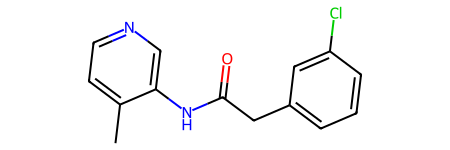

In [63]:
Chem.MolFromSmiles(moonshot.loc['TRY-UNI-714a760b-6'].SMILES)

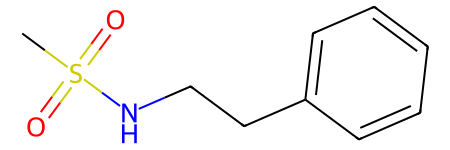

In [61]:
Chem.MolFromSmiles(moonshot.loc['AAR-POS-d2a4d1df-1'].SMILES)

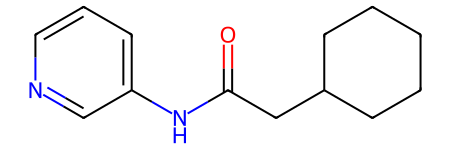

In [62]:
Chem.MolFromSmiles(moonshot.loc['ALE-HEI-f28a35b5-9'].SMILES)